In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

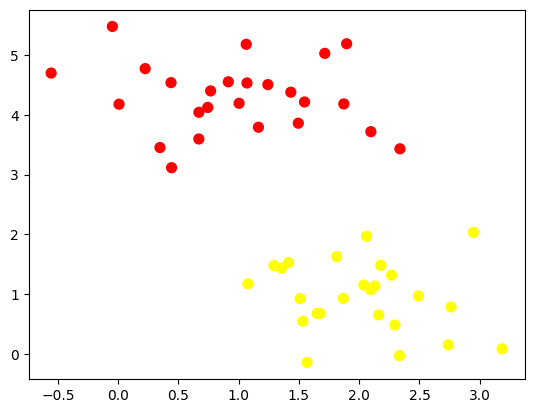

In [ ]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
# X-axis: feature 1, Y-axis: feature 2

In [ ]:
class LinearClassifier:
  def __init__(self, learning_rate=0.01, iterations=1000, loss_type='perceptron'):
    self.lr = learning_rate
    self.itr = iterations
    self.b = 0
    self.w = None
    self.loss = loss_type

  def fit(self, X, y):
    self.m, self.n = X.shape # samples, features
    self.w = np.zeros(self.n) # initallize weights for each feature
    self.X = X
    self.y = y # true label

    # apply subgradient descent for i iterations
    for i in range(self.itr):
      self.subgradientDescent()
    return self

  def subgradientDescent(self):
    y_pred = self.predict(self.X) #

    if self.loss == 'perceptron':
      indicator = (-self.y * y_pred >=0)
    elif self.loss == 'SVM':
      indicator = (self.y * y_pred < 1)

    if indicator.any():
      dw = np.dot(self.X.T, (-self.y * indicator)) / self.m
      db = np.sum(-(self.y * indicator)) / self.m
    else:
      return

    self.w = self.w - self.lr * dw
    self.b = self.b - self.lr * db

    return self

  def predict(self, X):
    return np.dot(X, self.w) + self.b

In [ ]:
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
perceptron_model = LinearClassifier(loss_type='perceptron')
perceptron_model.fit(X_train, y_train)
prediction = np.where(perceptron_model.predict(X_test) >= 0, 1, -1)
perceptron_accuracy = accuracy_score(y_test, prediction)
print(f"My perceptron: {perceptron_accuracy}")
train_prediction = np.where(perceptron_model.predict(X_train) >= 0, 1, -1)

svm_model = LinearClassifier(loss_type='SVM')
svm_model.fit(X_train, y_train)
prediction = np.where(svm_model.predict(X_test) >= 0, 1, -1)
svm_accuracy = accuracy_score(y_test, prediction)
print(f"My SVM: {svm_accuracy}")

My perceptron: 1.0
My SVM: 1.0


In [ ]:
from sklearn.linear_model import Perceptron as SKPerceptron
from sklearn.svm import LinearSVC

In [ ]:
sk_perceptron_model = SKPerceptron(max_iter=1000, tol=1e-3, random_state=0)
sk_perceptron_model.fit(X_train, y_train)
sk_perceptron_acc = sk_perceptron_model.score(X_test, y_test)
print(f"SkLearn perceptron: {sk_perceptron_acc}")

sk_svm_model = LinearSVC(loss='hinge', max_iter=1000, random_state=0)
sk_svm_model.fit(X_train, y_train)
sk_svm_acc = sk_svm_model.score(X_test, y_test)
print(f"SkLearn SVM: {sk_svm_acc}")

SkLearn perceptron: 1.0
SkLearn SVM: 1.0


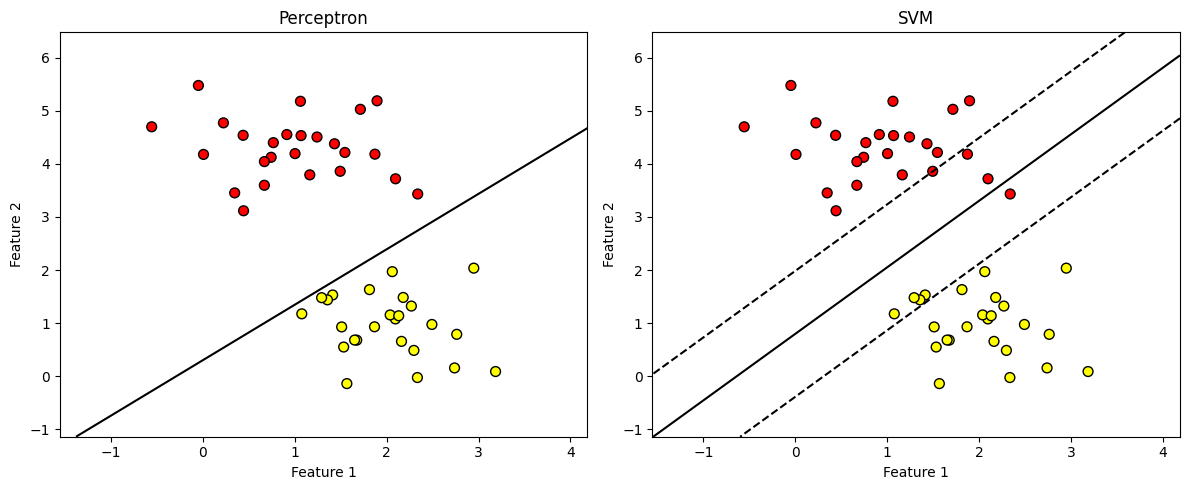

In [ ]:
def plot_decision_function(model, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolors='k')

    # Grid
    x_range = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
    y_range = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100)
    xx, yy = np.meshgrid(x_range, y_range)

    # Decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1],
                linestyles=['--', '-', '--'])

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Create the figure
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_function(perceptron_model, X, y, 'Perceptron')

plt.subplot(1, 2, 2)
plot_decision_function(svm_model, X, y, 'SVM')

plt.tight_layout()
plt.show()

d) My Perceptron Loss and SVM Loss functions both acheived 1.0 (100%) accuracy. The percepeptron loss only requires data points to be on the correct side of the boundary. However, SVM loss is much stricter, since it requres points to be outside a margin. The percpetron loss often results in a boundary being close to one cluster. Whereas, the SVM loss is closer in the middle of both clusters, which maximixes the distance between them. Although they both acheived 1.0 accuracy, SVM will be more accurate in classifying new unseen data points compared to perceptron.